In [2306]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import scipy as sp
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score, precision_score, \
recall_score, cohen_kappa_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from datetime import datetime
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2307]:
# pip install hyperopt

import graphviz

In [2308]:
shots_euro_champ = pd.read_csv(r'\\home.org.aalto.fi\uyant1\data\Desktop\TekIn Oy\Data Science for Business\DB2\3.Sports Analytics\shots_European_Championship.csv')
shots_euro_champ.loc[:, 'league'] = 'Euro'
shots_euro_champ.head()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal,league
0,1,31,91,29,0,1,0,0,0,0,Euro
1,1,143,71,29,0,1,0,0,1,0,Euro
2,1,220,96,57,0,1,0,0,1,0,Euro
3,1,248,96,61,0,0,0,1,1,0,Euro
4,1,557,75,33,0,0,1,0,0,0,Euro


In [2309]:
shots_france = pd.read_csv(r'\\home.org.aalto.fi\uyant1\data\Desktop\TekIn Oy\Data Science for Business\DB2\3.Sports Analytics\shots_France.csv')

shots_france.loc[:, 'league'] = 'France'
shots_france.head()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal,league
0,1,606,94,57,0,1,0,0,1,1,France
1,1,859,83,42,0,0,0,1,0,0,France
2,1,1568,96,43,0,1,0,0,1,1,France
3,1,1801,84,21,0,1,0,0,0,0,France
4,1,2010,73,51,0,1,0,0,1,0,France


In [2310]:
shots_germany = pd.read_csv(r'\\home.org.aalto.fi\uyant1\data\Desktop\TekIn Oy\Data Science for Business\DB2\3.Sports Analytics\shots_Germany.csv')
shots_germany.loc[:, 'league'] = 'Germany'
shots_germany.head()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal,league
0,1,248,83,66,0,1,0,0,1,0,Germany
1,1,529,95,59,0,0,0,1,1,1,Germany
2,1,668,91,66,0,1,0,0,1,0,Germany
3,1,673,88,49,0,1,0,0,1,0,Germany
4,1,949,74,42,0,1,0,0,0,0,Germany


In [2311]:
shots_england = pd.read_csv(r'\\home.org.aalto.fi\uyant1\data\Desktop\TekIn Oy\Data Science for Business\DB2\3.Sports Analytics\shots_England.csv')
shots_england.loc[:, 'league'] = 'England'
shots_england.head()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal,league
0,1,95,88,41,0,1,0,0,1,1,England
1,1,180,85,52,0,0,1,0,1,0,England
2,1,255,96,52,0,0,0,1,1,1,England
3,1,426,81,33,0,0,1,0,1,0,England
4,1,815,75,30,0,1,0,0,1,0,England


In [2312]:
shots_spain = pd.read_csv(r'\\home.org.aalto.fi\uyant1\data\Desktop\TekIn Oy\Data Science for Business\DB2\3.Sports Analytics\shots_Spain.csv')
shots_spain.loc[:, 'league'] = 'Spain'
shots_spain.head()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal,league
0,1,58,93,34,0,0,1,0,1,0,Spain
1,1,61,80,59,0,1,0,0,0,0,Spain
2,1,447,88,57,0,1,0,0,1,0,Spain
3,1,489,87,66,0,1,0,0,1,0,Spain
4,1,949,75,40,0,1,0,0,0,0,Spain


In [2313]:
shots_italy = pd.read_csv(r'\\home.org.aalto.fi\uyant1\data\Desktop\TekIn Oy\Data Science for Business\DB2\3.Sports Analytics\shots_Italy.csv')
shots_italy.loc[:, 'league'] = 'Italy'
shots_italy.head()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal,league
0,1,194,80,41,0,1,0,0,1,0,Italy
1,1,251,95,33,0,0,1,0,1,0,Italy
2,1,634,72,63,0,1,0,0,0,0,Italy
3,1,1359,91,62,0,1,0,0,1,0,Italy
4,1,1413,86,26,0,0,1,0,0,0,Italy


In [2314]:
shots_World_Cup = pd.read_csv(r'\\home.org.aalto.fi\uyant1\data\Desktop\TekIn Oy\Data Science for Business\DB2\3.Sports Analytics\shots_World_Cup.csv')
shots_World_Cup.loc[:, 'league'] = 'World'
shots_World_Cup=shots_World_Cup.drop(['target'], axis=1)
shots_World_Cup.head()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal,league
0,1,327,87,27,0,1,0,0,0,0,World
1,1,407,90,69,0,1,0,0,0,0,World
2,1,526,86,30,0,0,1,0,0,0,World
3,1,693,93,60,0,0,0,1,1,1,World
4,1,1266,86,38,0,0,1,0,0,0,World


In [2315]:
frames = [shots_World_Cup, shots_italy, shots_england,shots_spain,shots_germany,shots_euro_champ,shots_france]

result = pd.concat(frames)
result.head()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal,league
0,1,327,87,27,0,1,0,0,0,0,World
1,1,407,90,69,0,1,0,0,0,0,World
2,1,526,86,30,0,0,1,0,0,0,World
3,1,693,93,60,0,0,0,1,1,1,World
4,1,1266,86,38,0,0,1,0,0,0,World


In [2316]:
result['rightFoot']= result['rightFoot']==1
result['FK']= result['freeKick']==1
result['hot']= result['opportunity']==1
result['header']= result['head']==1
result['time']= result['time']/60
result['1st period']= result['period']==1


In [2317]:

def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

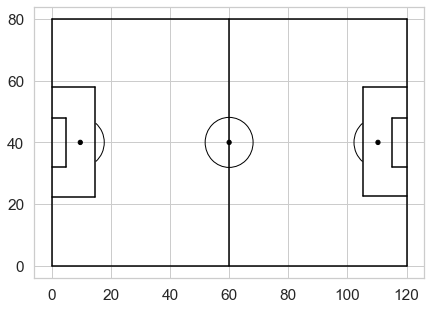

In [2319]:

fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.show()

In [2320]:
def draw_half_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([60,0], width = 60, height = 80, fill = False)
    #Right Penalty Area
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)

    #Right 6-yard Box
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = Arc((60,40),width = 8.1, height = 8.1, angle=0,theta1=270,theta2=90,color="black")
    centreSpot = plt.Circle((60,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, RightPenalty, RightSixYard, centreCircle, centreSpot, rightPenSpot, rightArc]
    for i in element:
        ax.add_patch(i)

In [2321]:
result['Goals']= result['goal']==1


In [2322]:
result.head()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal,league,FK,hot,header,1st period,Goals
0,1,5.450000,87,27,0,True,0,0,0,0,World,False,False,False,True,False
1,1,6.783333,90,69,0,True,0,0,0,0,World,False,False,False,True,False
2,1,8.766667,86,30,0,False,1,0,0,0,World,False,False,False,True,False
3,1,11.550000,93,60,0,False,0,1,1,1,World,False,True,True,True,True
4,1,21.100000,86,38,0,False,1,0,0,0,World,False,False,False,True,False


In [2323]:
result['x(m)']=result['x']*120/100
result['y(m)']=result['y']*80/100

In [2324]:
result.head()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal,league,FK,hot,header,1st period,Goals,x(m),y(m)
0,1,5.450000,87,27,0,True,0,0,0,0,World,False,False,False,True,False,104.4,21.6
1,1,6.783333,90,69,0,True,0,0,0,0,World,False,False,False,True,False,108.0,55.2
2,1,8.766667,86,30,0,False,1,0,0,0,World,False,False,False,True,False,103.2,24.0
3,1,11.550000,93,60,0,False,0,1,1,1,World,False,True,True,True,True,111.6,48.0
4,1,21.100000,86,38,0,False,1,0,0,0,World,False,False,False,True,False,103.2,30.4


In [2327]:
result=result.drop(['goal','period','opportunity','freeKick','leftFoot','head','x','y'], axis=1)


In [2328]:
result2=result.groupby('Goals')

In [2329]:
goals=result2.get_group(True)
goals.head()

,time,rightFoot,league,FK,hot,header,1st period,Goals,x(m),y(m)
3,11.550000,False,World,False,True,True,True,True,111.6,48.0
7,42.200000,False,World,False,True,False,True,True,111.6,30.4
12,25.900000,False,World,False,True,True,False,True,112.8,38.4
17,45.816667,False,World,False,True,False,False,True,103.2,23.2
18,48.983333,True,World,True,True,False,False,True,97.2,53.6


In [2330]:
result2['x(m)'].std()

Goals
False    9.857282
True     7.815241
Name: x(m), dtype: float64

In [2331]:
shots=result2.get_group(False)

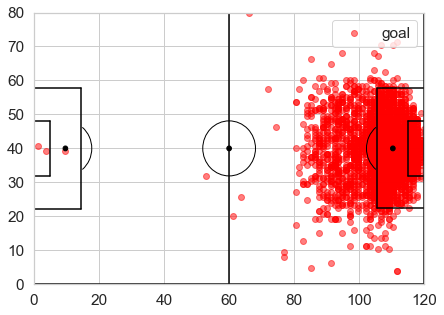

In [2332]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)

# draw the scatter plot for goals
x_coord_goal = [goals['x(m)']]
y_coord_goal = [goals['y(m)']]
# shots that end up with no goal
x_coord = [shots['x(m)']]
y_coord = [shots['y(m)'] ]
# put the two scatter plots on to the pitch
ax.scatter(x_coord_goal, y_coord_goal, c = 'red', label = 'goal',alpha=0.5)

plt.ylim(0, 80)
plt.xlim(0, 120)
plt.legend(loc='upper right')

plt.show()

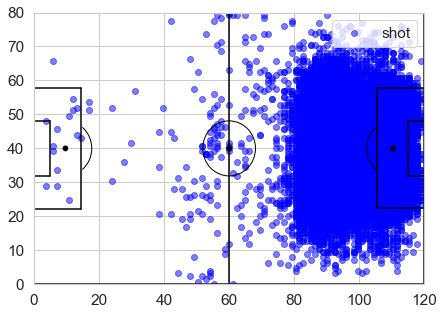

In [2333]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)

# draw the scatter plot for goals
# x_coord_goal = [goals['x(m)']]
# y_coord_goal = [goals['y(m)']]
# shots that end up with no goal
x_coord = [shots['x(m)']]
y_coord = [shots['y(m)']]
# # put the two scatter plots on to the pitch
# ax.scatter(x_coord_goal, y_coord_goal, c = 'red', label = 'goal',alpha=0.5)
ax.scatter(x_coord, y_coord, c = 'blue', label = 'shot',alpha=0.5)

plt.ylim(0, 80)
plt.xlim(0, 120)
plt.legend(loc='upper right')

plt.show()

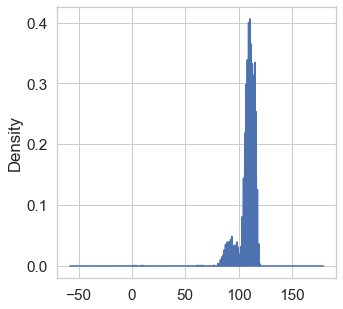

In [2334]:
ax = goals['x(m)'].plot.kde(bw_method=0.01)

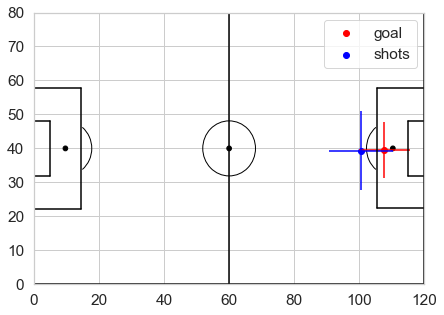

In [2335]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
stdx=goals['x(m)'].std()
stdy=goals['y(m)'].std()
stdxs=shots['x(m)'].std()
stdys=shots['y(m)'].std()
# draw the scatter plot for goals
x_coord_goal1 = goals['x(m)'].mean()
y_coord_goal1 = goals['y(m)'].mean()
# shots that end up with no goal
x_coord1 =shots['x(m)'].mean()
y_coord1 =shots['y(m)'].mean()
# put the two scatter plots on to the pitch
ax.scatter(x_coord_goal1, y_coord_goal1, c = 'red', label = 'goal')
plt.errorbar(x_coord_goal1,y_coord_goal1, yerr=stdy,xerr=stdx, ls='dashdot',color='red')

ax.scatter(x_coord1, y_coord1, c = 'blue', label = 'shots')
plt.errorbar(x_coord1,y_coord1, yerr=stdys,xerr=stdxs, ls='dashdot',color='blue')

plt.ylim(0, 80)
plt.xlim(0, 120)
plt.legend(loc='upper right')

plt.show()

In [2336]:
# fig, ax = plt.subplots()
# fig.set_size_inches(7, 5)

# x_coord_goal = [goals['x(m)']]
# y_coord_goal = [goals['y(m)']]

# #shades: give us the heat map we desire
# # n_levels: draw more lines, the larger n, the more blurry it looks
# sns.kdeplot(x_coord_goal, y_coord_goal, shade = "True", color = "green", n_levels = 30)
# plt.show()

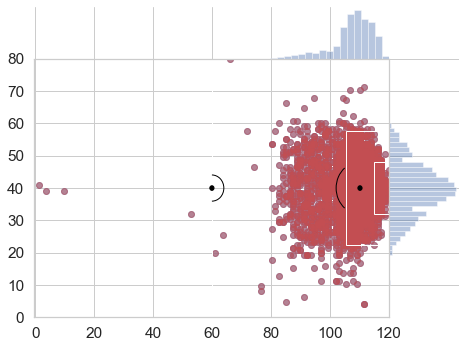

In [2337]:
# we # we use a joint plot to see the density of the shot distribution across the 2 axes of the pitch
joint_shot_chart = sns.jointplot(x_coord_goal, y_coord_goal, stat_func=None,
                                 kind='scatter', space=0, alpha=0.5)
joint_shot_chart.fig.set_size_inches(7,5)
ax = joint_shot_chart.ax_joint
# ax=fig.add_subplot(1,1,1)
# overlaying the plot with a pitch
draw_half_pitch(ax)
ax.set_xlim(-0.5,120)
ax.set_ylim(0,80)
# draw the scatter plot for goals
# draw the scatter plot for goals
x_coord_goal = goals['x(m)']
y_coord_goal = goals['y(m)']
# put the two scatter plots on to the pitch

ax.scatter(x_coord_goal, y_coord_goal, c = 'r', label = 'goal',alpha=0.5)


# Get rid of axis labels and tick marks
# ax.set_xlabel('')
# ax.set_ylabel('')
# joint_shot_chart.ax_marg_x.set_axis_off()
# ax.set_axis_off()
# plt.ylim(-.3, 80)

plt.show()

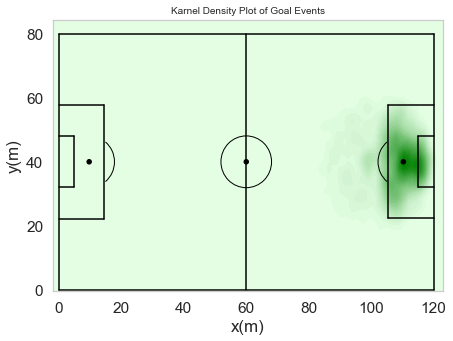

In [2338]:
# fig, ax = plt.subplots()
# fig.set_size_inches(7, 5)
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)

ax.set_title('Karnel Density Plot of Goal Events', fontsize=10)
# foot= goals['header']
#Kernel density plots showing the distribution of the events’ positions during match
#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord_goal, y_coord_goal, shade = "True", color = "green", n_levels = 40)
plt.show()

In [2339]:
result.corr()

,time,rightFoot,FK,hot,header,1st period,Goals,x(m),y(m)
time,1.000000,-0.000751,0.022012,0.002883,0.006170,-0.023265,-0.001258,-0.001309,-0.006697
rightFoot,-0.000751,1.000000,0.043091,-0.086632,-0.439877,-0.003478,-0.019168,-0.183923,0.044381
FK,0.022012,0.043091,1.000000,-0.049640,-0.096444,0.000673,-0.030047,-0.228494,-0.008529
hot,0.002883,-0.086632,-0.049640,1.000000,0.180686,-0.009926,0.215591,0.349703,0.013884
header,0.006170,-0.439877,-0.096444,0.180686,1.000000,0.011444,0.032028,0.367228,0.010092
1st period,-0.023265,-0.003478,0.000673,-0.009926,0.011444,1.000000,-0.020219,-0.008072,-0.007102
Goals,-0.001258,-0.019168,-0.030047,0.215591,0.032028,-0.020219,1.000000,0.219435,0.005895
x(m),-0.001309,-0.183923,-0.228494,0.349703,0.367228,-0.008072,0.219435,1.000000,0.013349
y(m),-0.006697,0.044381,-0.008529,0.013884,0.010092,-0.007102,0.005895,0.013349,1.000000


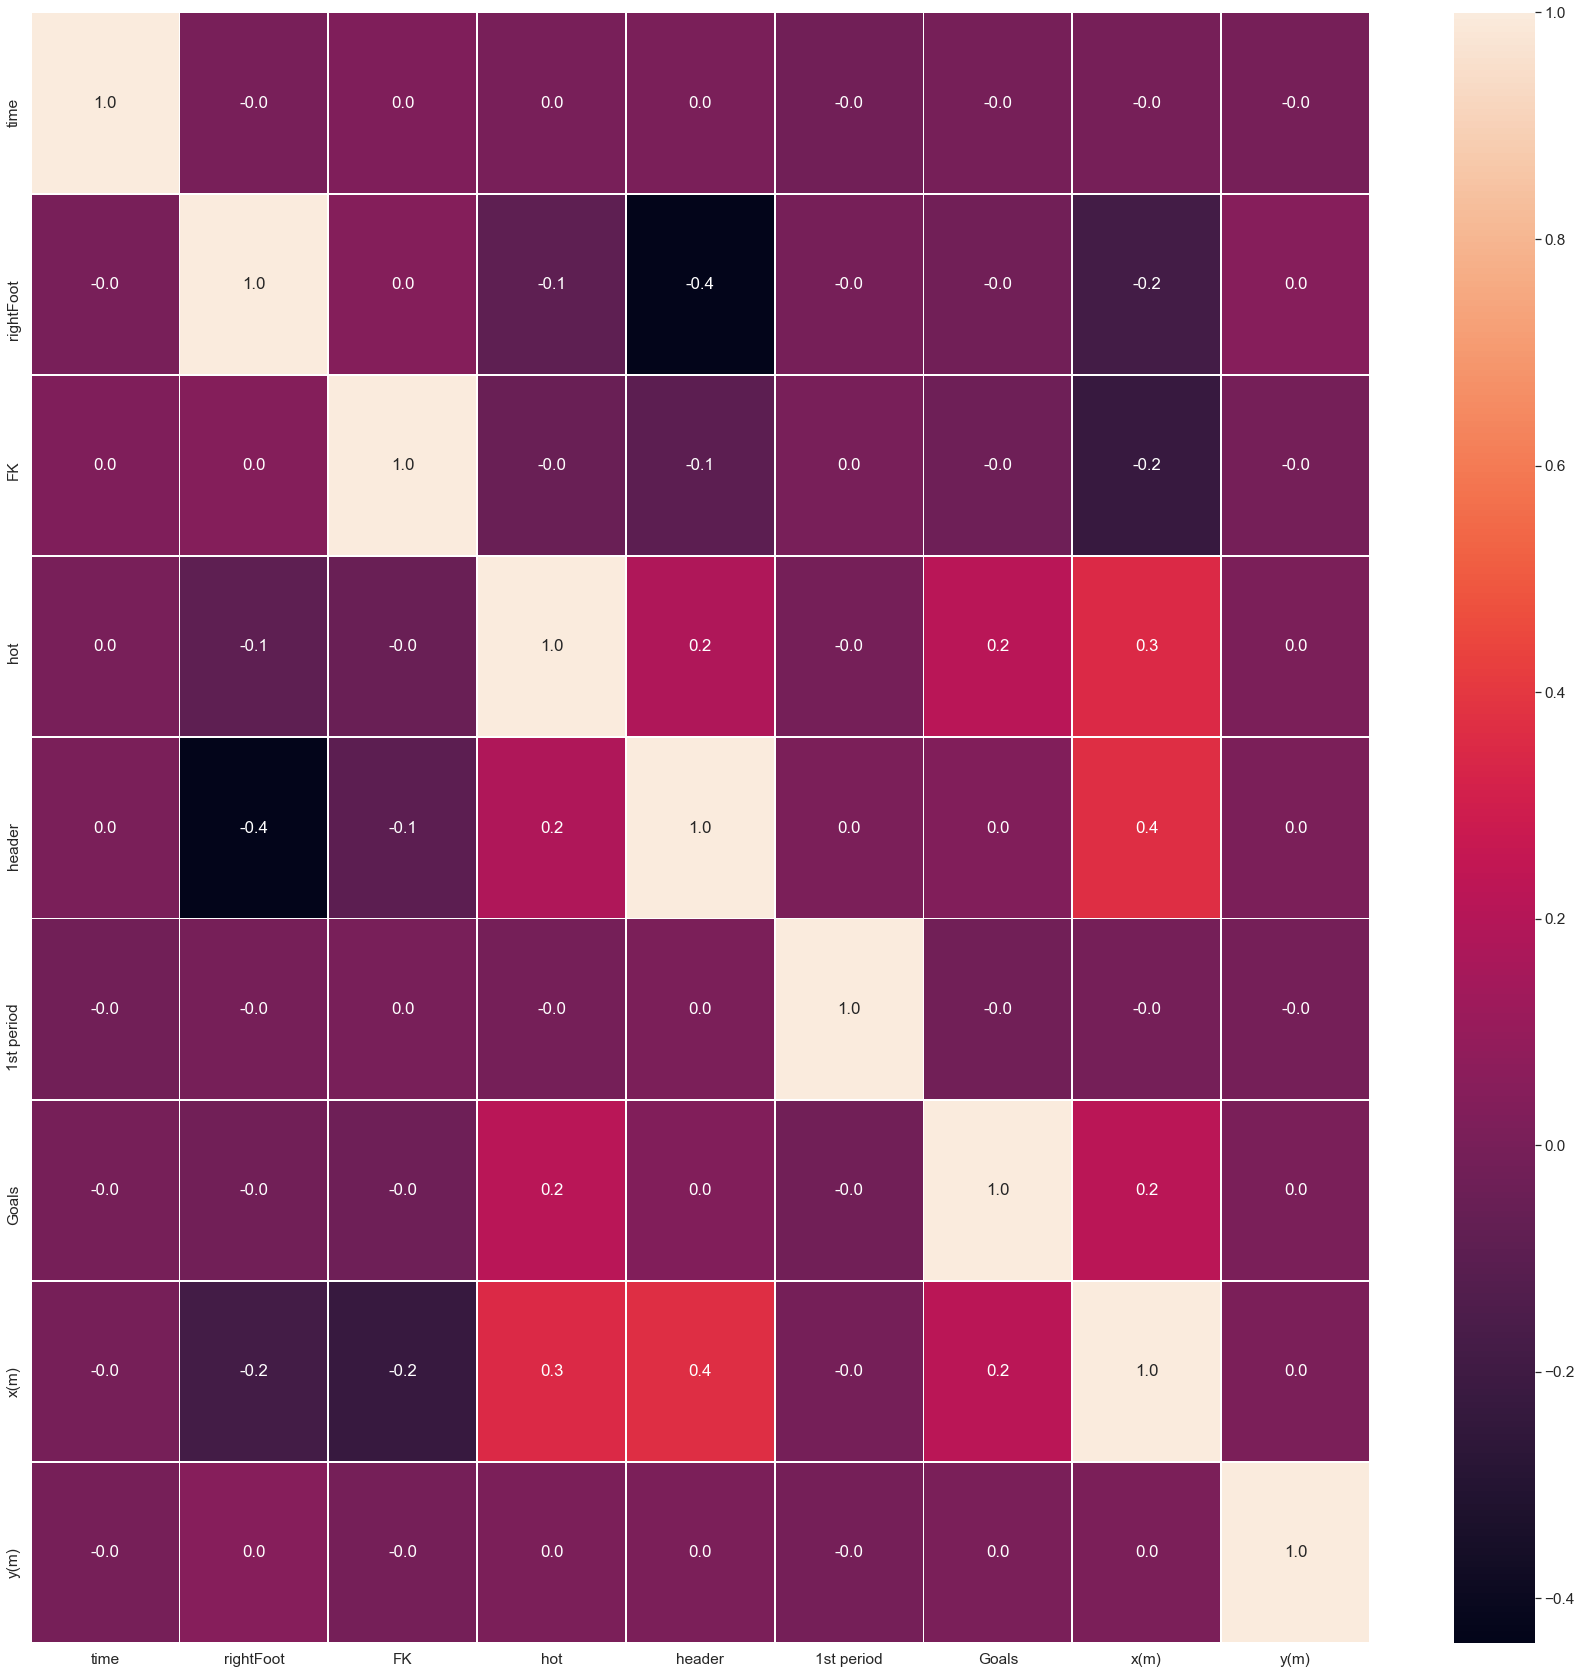

In [2340]:
f,ax = plt.subplots(figsize=(30, 30))
sns.set(font_scale=1.4)
annot_kws={"size": 16}
sns.heatmap(result.corr(), annot=True, linewidths=.9, fmt= '.1f',ax=ax)
plt.show()

In [2341]:
result['id_event']='0'

In [2342]:
goalsg  = result.groupby(['Goals', 'league']).count().reset_index().rename(columns={'id_event': 'count'})
goalsg.Goals = goalsg.Goals.replace({True: 'Goal', False: 'No Goal'})
goalsg=goalsg[['Goals','league','count']]


In [2343]:
goalsg['percentage']=0
for i in range(len(goalsg)):
    for league in goals.league.unique():
        if goalsg.iloc[i,goalsg.columns.get_loc("league")]==league:
            goalsg.iloc[i,goalsg.columns.get_loc("percentage")]=goalsg.iloc[i,goalsg.columns.get_loc("count")] / \
                                                            goalsg[goalsg.league==league]['count'].sum()
goalsg['percentage']=round(goalsg['percentage']*100,2)

goalsg

,Goals,league,count,percentage
0,No Goal,England,7869,89.41
1,No Goal,Euro,1186,92.44
2,No Goal,France,7949,89.84
3,No Goal,Germany,6432,89.37
4,No Goal,Italy,8332,90.36
5,No Goal,Spain,7520,89.18
6,No Goal,World,1370,91.03
7,Goal,England,932,10.59
8,Goal,Euro,97,7.56
9,Goal,France,899,10.16


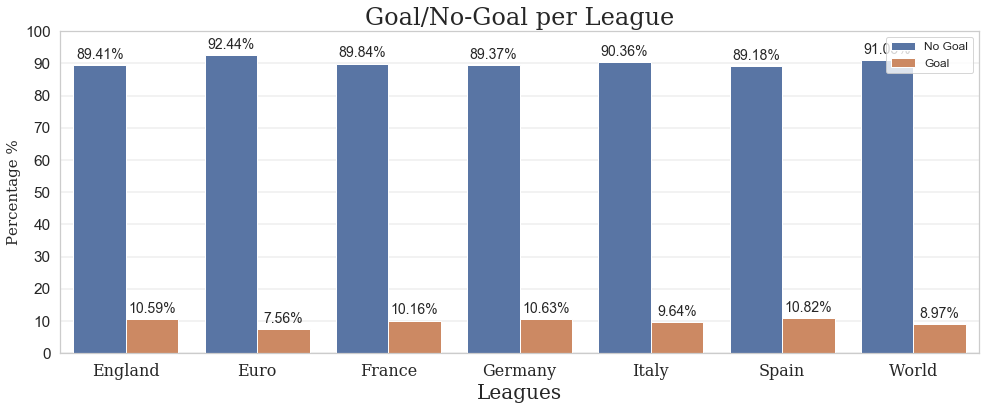

In [2344]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}%'.format(p.get_height())
            ax.text(_x, _y+2, value, ha="center", fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[14,6])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(data=goalsg, y='percentage', hue='Goals', x='league')
ax.set_yticks(np.arange(0,110,10))
ax.set_ylabel(ylabel='Percentage %', fontsize=15, fontfamily='serif')
ax.set_xlabel(xlabel='Leagues', fontsize=20, fontfamily='serif')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')
plt.title("Goal/No-Goal per League", fontsize=24, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
plt.legend(fontsize=12)

show_values_on_bars(ax)
plt.show()

# Filtering the data

In [2345]:
result['Goals'].value_counts()

False    40658
True      4629
Name: Goals, dtype: int64

In [2234]:
result['hot'].value_counts()

True     31787
False    13500
Name: hot, dtype: int64

In [2235]:
filterinfDataframe = result[(result['Goals'] == False) & (result['hot'] ==True) ]

# GradientBoostingClassifier

In [2346]:
X = result[['rightFoot','hot','1st period','x(m)','y(m)','FK','header']]
y = result['Goals']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [2347]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def evaluate_model(params): 
    model = GradientBoostingClassifier(
                        learning_rate=params['learning_rate'],
                        min_samples_leaf=params['min_samples_leaf'],
                        max_depth = params['max_depth'],
                        max_features = params['max_features']
                        )

    model.fit(X_train, y_train)
    return {
        'learning_rate': params['learning_rate'],
        'min_samples_leaf': params['min_samples_leaf'],
        'max_depth': params['max_depth'],
        'max_features': params['max_features'],
        'train_ROCAUC': roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
        'test_ROCAUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
        'recall': recall_score(y_test, model.predict(X_test)),
        'precision': precision_score(y_test, model.predict(X_test)),
        'f1_score': f1_score(y_test, model.predict(X_test)),
        'train_accuracy': model.score(X_train, y_train),
        'test_accuracy': model.score(X_test, y_test),
    }

def objective(params):
    res = evaluate_model(params)
    
    res['loss'] = - res['test_ROCAUC'] # Esta loss es la que hyperopt intenta minimizar
    res['status'] = STATUS_OK # Asi le decimos a hyperopt que el experimento salio bien
    return res 

hyperparameter_space = {
        'learning_rate': hp.uniform('learning_rate', 0.05, 0.3),
        'min_samples_leaf': hp.choice('min_samples_leaf', range(15, 200)),
        'max_depth': hp.choice('max_depth', range(2, 20)),
        'max_features': hp.choice('max_features', range(1, 8))
}

In [2348]:
trials = Trials()
fmin(
    objective,
    space=hyperparameter_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
);

100%|██████████| 50/50 [02:32<00:00,  3.05s/trial, best loss: -0.8142564166157816]


In [2349]:
pd.DataFrame(trials.results).sort_values(by='f1_score', ascending=False).head(5)

,learning_rate,min_samples_leaf,max_depth,max_features,train_ROCAUC,test_ROCAUC,recall,precision,f1_score,train_accuracy,test_accuracy,loss,status
33,0.201145,137,4,5,0.834738,0.811499,0.112260,0.652361,0.191556,0.901798,0.905572,-0.811499,ok
39,0.257160,144,5,7,0.842535,0.809253,0.111521,0.653680,0.190536,0.902524,0.905572,-0.809253,ok
15,0.132694,47,19,2,0.895891,0.782792,0.113737,0.527397,0.187120,0.905521,0.901524,-0.782792,ok
25,0.148456,42,5,4,0.838909,0.810708,0.108567,0.644737,0.185841,0.901956,0.905204,-0.810708,ok
48,0.173340,182,9,4,0.854641,0.802820,0.108567,0.644737,0.185841,0.902713,0.905204,-0.802820,ok


In [2350]:
model = GradientBoostingClassifier(
                        learning_rate=0.201145,
                        min_samples_leaf=137,
                        max_depth = 4,
                        max_features = 5
                        )
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.201145, loss='deviance', max_depth=4,
                           max_features=5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=137, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [2351]:
print('The accuracy of classifying whether a shot is goal or not is {}%.'.format(round(model.score(X_test, y_test)*100),2))

The accuracy of classifying whether a shot is goal or not is 90.0%.


In [2352]:
print('Our classifier obtains an ROC-AUC of {}%'.format(round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])*100),2))

Our classifier obtains an ROC-AUC of 81.0%


In [2353]:
print('The baseline performance for PR-AUC is {}%. This is the PR-AUC that what we would get by random guessing.'.format(round(y_train.mean(),2)))
print('Our model obtains an PR-AUC of {}%.'.format(round(average_precision_score(y_test, model.predict_proba(X_test)[:, 1])*100,2)))
print('Our classifier obtains a Cohen Kappa of {}.'.format(round(cohen_kappa_score(y_test,model.predict(X_test)),2)))

The baseline performance for PR-AUC is 0.1%. This is the PR-AUC that what we would get by random guessing.
Our model obtains an PR-AUC of 35.3%.
Our classifier obtains a Cohen Kappa of 0.16.


In [2354]:
print(color.BOLD + color.YELLOW + 'Confusion Matrix:\n' + color.END)
print(confusion_matrix(y_test,model.predict(X_test)))
print(color.BOLD +  color.YELLOW + '\n Report:' + color.END)
print(classification_report(y_test,model.predict(X_test)))

Confusion Matrix:

[[12153    80]
 [ 1212   142]]

 Report:
              precision    recall  f1-score   support

       False       0.91      0.99      0.95     12233
        True       0.64      0.10      0.18      1354

    accuracy                           0.90     13587
   macro avg       0.77      0.55      0.56     13587
weighted avg       0.88      0.90      0.87     13587



In [2355]:
import eli5
eli5.explain_weights(model, feature_names=list(X_train.columns))

Weight,Feature
0.3839 ± 0.4545,x(m)
0.2800 ± 0.4599,y(m)
0.2483 ± 0.1882,hot
0.0741 ± 0.1527,header
0.0067 ± 0.1855,1st period
0.0038 ± 0.0966,FK
0.0032 ± 0.1348,rightFoot


# XGBOOST


In [2367]:
X = result[['rightFoot','hot','1st period','x(m)','y(m)','FK','header']]
y = result['Goals']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=123)

In [2370]:
from sklearn import preprocessing


from sklearn.model_selection import *
from sklearn.model_selection import learning_curve, GridSearchCV

In [2371]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [2372]:
params = {
        'min_child_weight': [1, 5],
        'gamma': [0, 1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [2, 3, 4]
        }

In [2384]:
folds =5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = GridSearchCV(estimator=xg_model, param_grid=params, scoring='roc_auc', n_jobs=-1, cv=skf.split(X,y), verbose=3 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.7min finished
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 3 minutes and 44.16 seconds.


In [2387]:
# print('\n All results:')
# print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

 Best normalized gini score for 5-fold search with 5 parameter combinations:
0.6344621641990613

 Best hyperparameters:
{'colsample_bytree': 1.0, 'gamma': 0, 'max_depth': 2, 'min_child_weight': 5, 'subsample': 0.8}


In [2388]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_max_depth,param_min_child_weight,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.114344,0.090173,0.045279,0.019315,0.6,0,2,1,0.6,"{'colsample_bytree': 0.6, 'gamma': 0, 'max_dep...",0.822208,0.817987,0.821837,0.807944,0.807382,0.815472,0.006547,48
1,2.237226,0.213792,0.027526,0.004306,0.6,0,2,1,0.8,"{'colsample_bytree': 0.6, 'gamma': 0, 'max_dep...",0.820440,0.816476,0.821902,0.805191,0.807836,0.814369,0.006707,83
2,2.018427,0.048995,0.041090,0.010987,0.6,0,2,1,1,"{'colsample_bytree': 0.6, 'gamma': 0, 'max_dep...",0.817357,0.815671,0.820632,0.806520,0.805988,0.813234,0.005921,93
3,2.596260,0.095216,0.044082,0.018089,0.6,0,2,5,0.6,"{'colsample_bytree': 0.6, 'gamma': 0, 'max_dep...",0.820715,0.819073,0.821682,0.807789,0.807671,0.815386,0.006307,53
4,2.710057,0.073525,0.028324,0.001849,0.6,0,2,5,0.8,"{'colsample_bytree': 0.6, 'gamma': 0, 'max_dep...",0.820197,0.818321,0.822790,0.806579,0.807131,0.815004,0.006805,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,4.677912,0.170460,0.033311,0.003191,1,1,4,1,0.8,"{'colsample_bytree': 1.0, 'gamma': 1, 'max_dep...",0.818381,0.816923,0.819115,0.805062,0.803780,0.812652,0.006770,104
104,3.782321,0.123720,0.032912,0.000892,1,1,4,1,1,"{'colsample_bytree': 1.0, 'gamma': 1, 'max_dep...",0.822198,0.820180,0.823427,0.810198,0.807278,0.816656,0.006613,6
105,5.160865,0.237222,0.032114,0.001596,1,1,4,5,0.6,"{'colsample_bytree': 1.0, 'gamma': 1, 'max_dep...",0.819234,0.817348,0.817167,0.805097,0.804630,0.812695,0.006437,103
106,4.857373,0.499467,0.036104,0.005726,1,1,4,5,0.8,"{'colsample_bytree': 1.0, 'gamma': 1, 'max_dep...",0.818779,0.816484,0.818159,0.805453,0.804362,0.812647,0.006373,105


In [2375]:
# trials1 = Trials()
# fmin(
#     objective1,
#     space=hyperparameter_space1,
#     algo=tpe.suggest,
#     max_evals=50,
#     trials=trials1
# );

In [2389]:
xg_model2=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=5,monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [2390]:
xg_model2.fit(X_train1,y_train1)

preds = xg_model2.predict(X_test1)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:22:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [2391]:
print('The accuracy of classifying whether a shot is goal or not is {}%.'.format(round(xg_model2.score(X_test1, y_test1)*100),2))

The accuracy of classifying whether a shot is goal or not is 90.0%.


In [2392]:
print('Our classifier obtains an ROC-AUC of {}%'.format(round(roc_auc_score(y_test1, xg_model2.predict_proba(X_test1)[:, 1])*100),2))

Our classifier obtains an ROC-AUC of 82.0%


In [2393]:
print(color.BOLD + color.YELLOW + 'Confusion Matrix:\n' + color.END)
print(confusion_matrix(y_test1,xg_model2.predict(X_test1)))
print(color.BOLD +  color.YELLOW + '\n Report:' + color.END)
print(classification_report(y_test1,xg_model2.predict(X_test1)))

Confusion Matrix:

[[12097    69]
 [ 1288   133]]

 Report:
              precision    recall  f1-score   support

       False       0.90      0.99      0.95     12166
        True       0.66      0.09      0.16      1421

    accuracy                           0.90     13587
   macro avg       0.78      0.54      0.56     13587
weighted avg       0.88      0.90      0.87     13587



In [2394]:
print('The baseline performance for PR-AUC is {}%. This is the PR-AUC that what we would get by random guessing.'.format(round(y_train1.mean(),2)))
print('Our model obtains an PR-AUC of {}%.'.format(round(average_precision_score(y_test1, xg_model2.predict_proba(X_test1)[:, 1])*100,2)))
print('Our classifier obtains a Cohen Kappa of {}.'.format(round(cohen_kappa_score(y_test1,xg_model2.predict(X_test1)),2)))

The baseline performance for PR-AUC is 0.1%. This is the PR-AUC that what we would get by random guessing.
Our model obtains an PR-AUC of 37.33%.
Our classifier obtains a Cohen Kappa of 0.14.


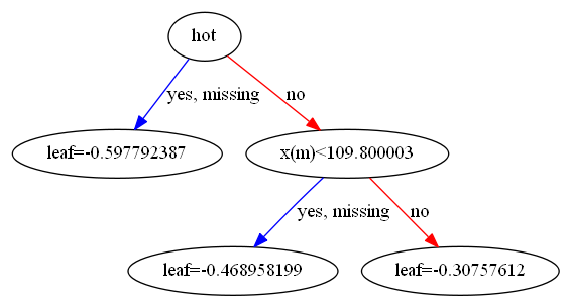

In [2395]:
xgb.plot_tree(xg_model2,num_trees=0)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

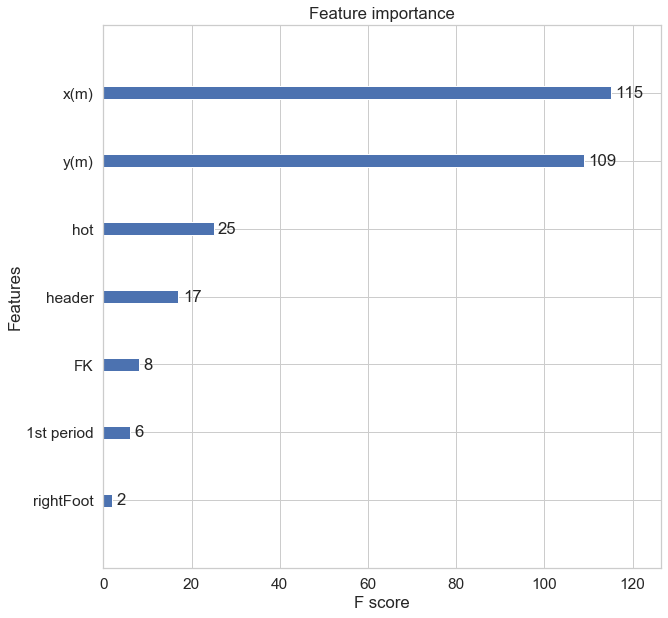

In [2396]:
xgb.plot_importance(xg_model2)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
# grid = GridSearchCV(estimator=xg_model, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3 )
# grid.fit(X, y)
# print('\n All results:')
# print(grid.cv_results_)
# print('\n Best estimator:')
# print(grid.best_estimator_)
# print('\n Best score:')
# print(grid.best_score_ * 2 - 1)
# print('\n Best parameters:')
# print(grid.best_params_)
# results = pd.DataFrame(grid.cv_results_)
# results.to_csv('xgb-grid-search-results-01.csv', index=False)

# y_test1 = grid.best_estimator_.predict_proba(test)
# # results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test1[:,1]})
# # results_df.to_csv('submission-grid-search-xgb-porto-01.csv', index=False)
